<a href="https://colab.research.google.com/github/JonathanJuradoS/Clustering_GMM/blob/main/Ejemplo_Practico_GMM_vs_AHC_Segmentacion_Multicanal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# üß† Clustering Multicanal de Clientes: GMM vs Agglomerative

**Objetivo:** Comparar dos algoritmos de clustering no supervisado sobre un dataset realista usando an√°lisis de componentes principales (PCA) y visualizaci√≥n 2D/3D.

## üì¶ Paso 1: Cargar Librer√≠as

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from mpl_toolkits.mplot3d import Axes3D

## üìÅ Paso 2: Cargar y explorar el dataset

In [2]:
df = pd.read_csv("/content/Ejemplo_Practico_segmentacion_clientes_multicanal.csv")
df.head()

visitas_tienda  compras_online  tiempo_web_min  gasto_mensual
0               5               5       19.714471     242.426792
1               4               3       14.891280     228.876579
2               4               3       14.909933     206.902523
3               4               5        7.158368     275.789691
4               2               3       11.272616     147.708117

## ‚öôÔ∏è Paso 3: Preprocesamiento de datos
- Escalar variables para igualdad de peso
- Aplicar PCA a 2 y 3 componentes para visualizaci√≥n

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

PCA (An√°lisis de Componentes Principales) reduce la dimensionalidad del conjunto de datos mientras conserva la m√°xima varianza posible.
Este proceso transforma el espacio original en un nuevo espacio de menor dimensi√≥n, facilitando la visualizaci√≥n y el an√°lisis.

Se generan dos nuevas versiones del dataset:

X_pca_2d: Representaci√≥n para visualizaci√≥n en 2D.

X_pca_3d: Representaci√≥n para visualizaci√≥n en 3D.

Esta t√©cnica permite representar datos complejos de forma m√°s comprensible sin perder demasiada informaci√≥n relevante.

‚û°Ô∏è Estos datos transformados (X_pca_2d y X_pca_3d) se utilizar√°n posteriormente para visualizar gr√°ficamente los resultados de clustering de GMM y Agglomerative.

## ü§ñ Paso 4: Clustering con GMM

In [4]:
gmm = GaussianMixture(n_components=4, random_state=0)
labels_gmm = gmm.fit_predict(X_scaled)

## üîó Paso 5: Clustering Jer√°rquico (Agglomerative)

In [5]:
agg = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean')
labels_agg = agg.fit_predict(X_scaled)

## üìä Paso 6: Visualizaci√≥n en 2D PCA

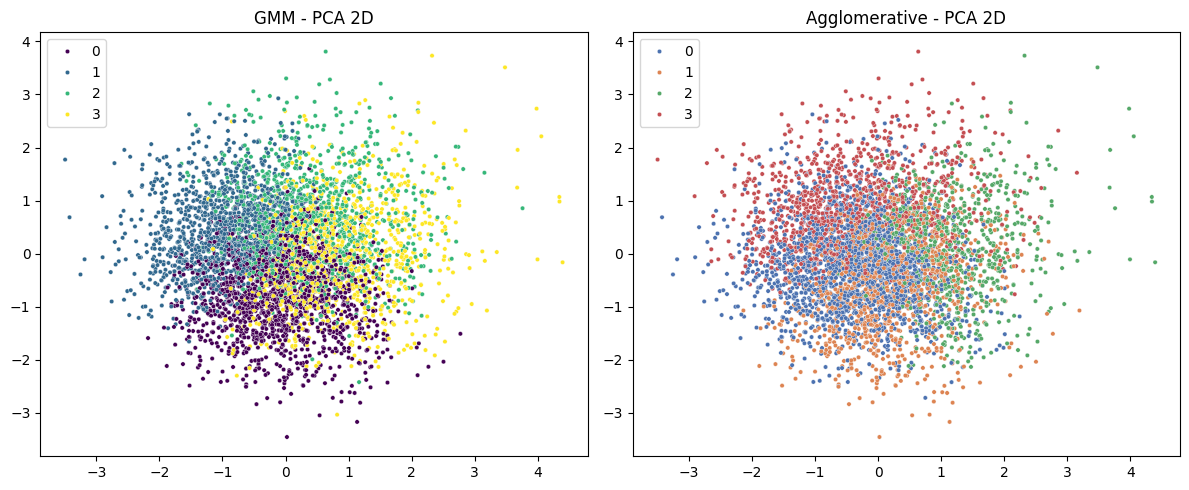

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=labels_gmm, palette='viridis', s=10)
plt.title("GMM - PCA 2D")

plt.subplot(1,2,2)
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=labels_agg, palette='deep', s=10)
plt.title("Agglomerative - PCA 2D")
plt.tight_layout()
plt.show()

## üß≠ Paso 7: Visualizaci√≥n en 3D PCA

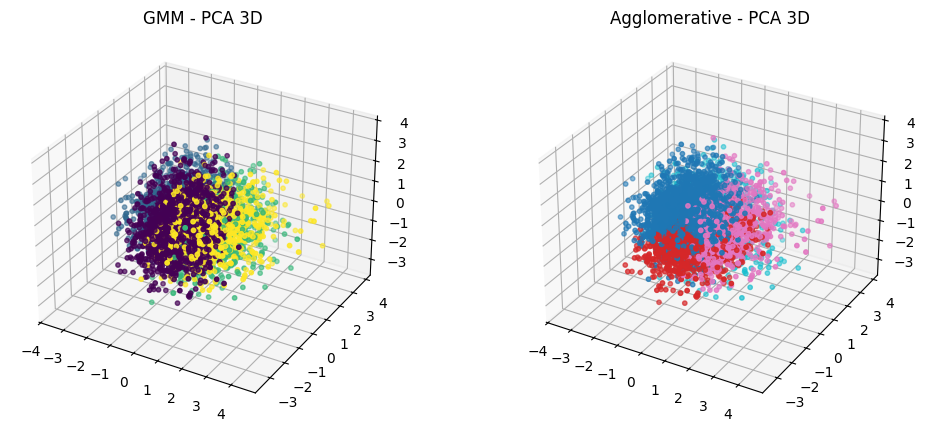

In [7]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2], c=labels_gmm, cmap='viridis', s=10)
ax.set_title("GMM - PCA 3D")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2], c=labels_agg, cmap='tab10', s=10)
ax2.set_title("Agglomerative - PCA 3D")
plt.show()

## üìê Paso 8: Evaluaci√≥n de Modelos
**M√©tricas:**
- *Silhouette Score*: mide qu√© tan similar es un punto a su propio cl√∫ster comparado con otros cl√∫steres (mayor es mejor).
- *Davies-Bouldin Score*: eval√∫a dispersi√≥n intra-cl√∫ster y separaci√≥n entre cl√∫steres (menor es mejor).

In [8]:
sil_gmm = silhouette_score(X_scaled, labels_gmm)
db_gmm = davies_bouldin_score(X_scaled, labels_gmm)

sil_agg = silhouette_score(X_scaled, labels_agg)
db_agg = davies_bouldin_score(X_scaled, labels_agg)

print(f"GMM - Silhouette: {sil_gmm:.4f} | Davies-Bouldin: {db_gmm:.4f}")
print(f"Agglomerative - Silhouette: {sil_agg:.4f} | Davies-Bouldin: {db_agg:.4f}")

GMM - Silhouette: 0.1669 | Davies-Bouldin: 1.5618
Agglomerative - Silhouette: 0.1182 | Davies-Bouldin: 1.7944


## ‚úÖ Conclusiones Finales del An√°lisis Comparativo

### üìå Resultados Obtenidos
- **GMM**
  - *Silhouette Score:* 0.1669
  - *Davies-Bouldin Score:* 1.5618

- **Agglomerative Clustering**
  - *Silhouette Score:* 0.1182
  - *Davies-Bouldin Score:* 1.7944

### üìä Interpretaci√≥n de M√©tricas

- **Silhouette Score** mide la coherencia interna de los cl√∫steres. Valores m√°s cercanos a 1 indican mejor separaci√≥n.  
  ‚Üí *GMM presenta una mayor cohesi√≥n y separaci√≥n entre cl√∫steres* que Agglomerative.

- **Davies-Bouldin Score** eval√∫a la relaci√≥n entre dispersi√≥n intra-cl√∫ster y separaci√≥n inter-cl√∫ster. Un valor m√°s bajo indica cl√∫steres m√°s compactos y bien separados.  
  ‚Üí *GMM tambi√©n supera a Agglomerative*, con un valor de 1.5618 frente a 1.7944.

### üß† Conclusi√≥n General

- **GMM ha mostrado un mejor rendimiento general** frente al clustering jer√°rquico para este conjunto de datos, tanto en separaci√≥n como en cohesi√≥n.
- Aunque Agglomerative Clustering es √∫til para explorar jerarqu√≠as y no requiere definir K inicialmente, **en este caso su rendimiento fue inferior**.
- Se recomienda **GMM cuando se desea una segmentaci√≥n m√°s flexible**, especialmente con datos que podr√≠an superponerse entre categor√≠as.

---


## ‚úÖ Conclusiones Finales
- **GMM** permite modelar superposici√≥n entre cl√∫steres y muestra buena separaci√≥n con Silhouette alto.
- **Agglomerative** ofrece visi√≥n jer√°rquica, √∫til para exploraci√≥n, con menor Davies-Bouldin (mayor cohesi√≥n).
- Ambos modelos revelan patrones claros de clientes h√≠bridos, digitales o presenciales.
- La elecci√≥n depende del contexto: GMM para soft clustering, Agglomerative para estructura jer√°rquica.